<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Regression/blob/main/Polinomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
df = pd.read_csv(URL)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


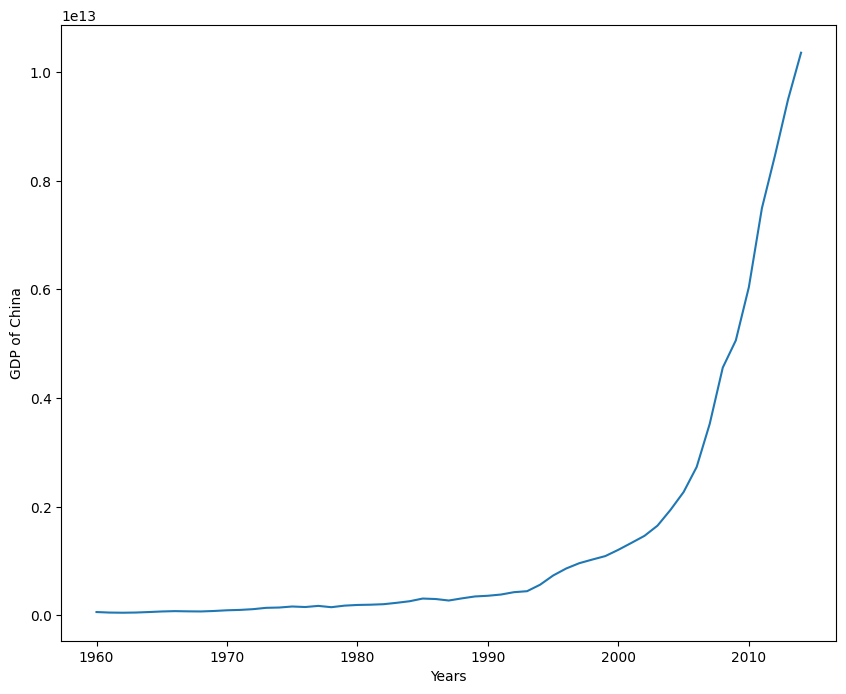

In [14]:
plt.figure(figsize=(10, 8))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data)
plt.xlabel("Years")
plt.ylabel("GDP of China")
plt.show()

In [22]:
x = np.asanyarray(df[["Year"]] / df['Year'].max())
y = np.asanyarray(df[['Value']] / df[['Value']].max())

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [24]:
yhat = model.predict(x)

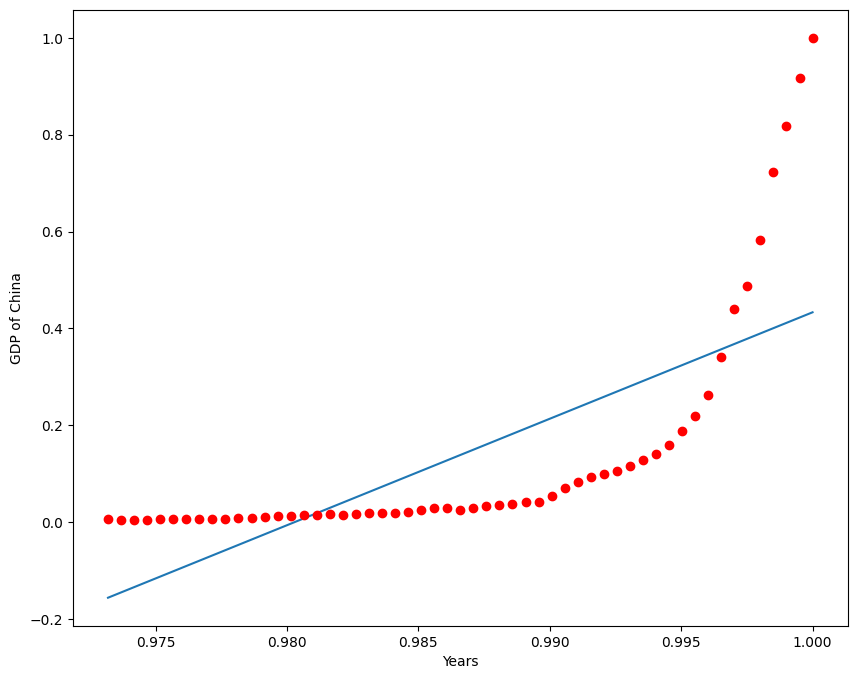

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(x, yhat, label='fit')
plt.plot(x,y,'ro', label='data')
plt.xlabel("Years")
plt.ylabel("GDP of China")
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y, yhat)
MAE

0.12657979406214762

**Polinomial Regression**

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4,include_bias=False) # transformer
x_poly = poly_features.fit_transform(x)

In [60]:
x_poly[0]

array([0.97318769, 0.94709427, 0.92170048, 0.89698756])

In [61]:
model.fit(x_poly, y)

LinearRegression()

In [62]:
yhat = model.predict(x_poly)

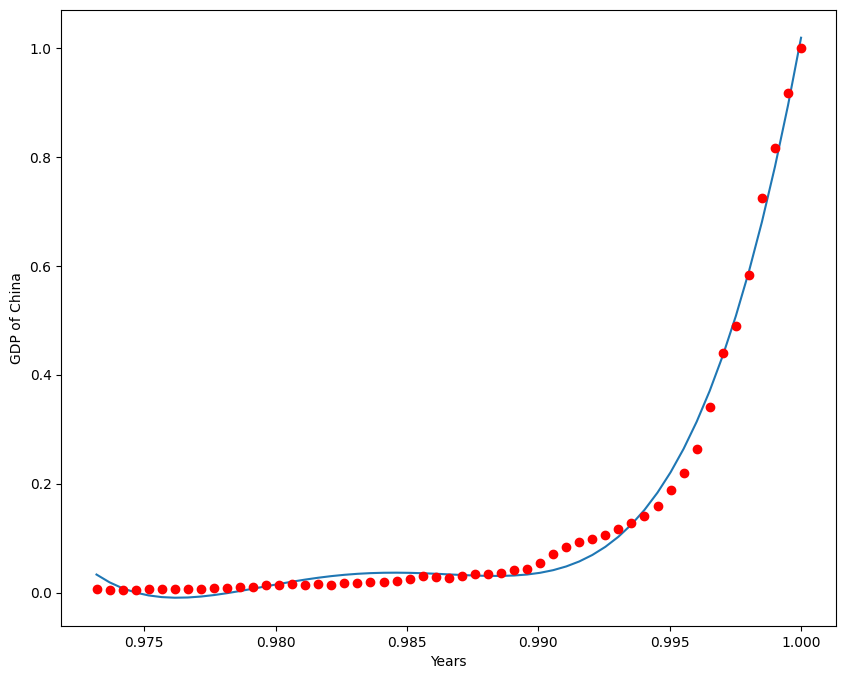

In [63]:
plt.figure(figsize=(10, 8))
plt.plot(x, yhat, label='fit')
plt.plot(x,y,'ro', label='data')
plt.xlabel("Years")
plt.ylabel("GDP of China")
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y, yhat)
MAE

0.015865023033341388

**Pipline**

In [66]:
from sklearn.pipeline import Pipeline

polinomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3,include_bias=False)),
    ('model', LinearRegression())
])

polinomial_regression.fit(x,y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

In [67]:
polinomial_regression.predict(x)

array([[-6.81741789e-02],
       [-4.49667001e-02],
       [-2.47173226e-02],
       [-7.26617436e-03],
       [ 7.54661663e-03],
       [ 1.98809224e-02],
       [ 2.98966149e-02],
       [ 3.77535662e-02],
       [ 4.36116483e-02],
       [ 4.76307333e-02],
       [ 4.99706931e-02],
       [ 5.07913999e-02],
       [ 5.02527256e-02],
       [ 4.85145421e-02],
       [ 4.57367217e-02],
       [ 4.20791361e-02],
       [ 3.77016577e-02],
       [ 3.27641582e-02],
       [ 2.74265098e-02],
       [ 2.18485843e-02],
       [ 1.61902541e-02],
       [ 1.06113909e-02],
       [ 5.27186692e-03],
       [ 3.31553922e-04],
       [-4.04967580e-03],
       [-7.71195025e-03],
       [-1.04953976e-02],
       [-1.22401457e-02],
       [-1.27863225e-02],
       [-1.19740561e-02],
       [-9.64347430e-03],
       [-5.63470525e-03],
       [ 2.12123239e-04],
       [ 8.05688309e-03],
       [ 1.80594462e-02],
       [ 3.03796848e-02],
       [ 4.51774708e-02],
       [ 6.26126763e-02],
       [ 8.2